# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [33]:
import pandas as pd
from matplotlib import pyplot as plt
import json
import requests
from config import weather_key
from citipy import citipy
import time 
import numpy as np
import random 
import scipy.stats as st

In [34]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
cities = []
units ="imperial"

## Generate Cities List

In [3]:
#Generate Longitudes, Latitudes, then Append the city names
for i in range(100):
    Long = round(random.uniform(-180, 180), 2)
    Lat = round(random.uniform(-90, 90), 2)
    city = citipy.nearest_city(Lat, Long).city_name
    if city not in cities:
        cities.append(city)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Get weather data
counter = 0
name_city = []
longitude = []
latitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []

for city in cities:
    try:
        query_url = url + "appid=" + weather_key + "&q=" + city + "&units=" + units
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        name_city.append(weather_json['name'])
        longitude.append(weather_json['coord']['lon'])
        latitude.append(weather_json['coord']['lat'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        counter += 1
        print(f'Retrieving data for {city}. This is city #{counter}.')
        time.sleep(1)
    except:
        print('Data not found. Moving along home.')
        continue

Retrieving front royal data. This is city #1.
Data not found. Move along home.
Retrieving cabedelo data. This is city #2.
Retrieving kremenki data. This is city #3.
Retrieving avarua data. This is city #4.
Retrieving punta arenas data. This is city #5.
Retrieving cobija data. This is city #6.
Retrieving rikitea data. This is city #7.
Retrieving cervo data. This is city #8.
Retrieving albany data. This is city #9.
Retrieving clyde river data. This is city #10.
Retrieving tiksi data. This is city #11.
Retrieving vestmanna data. This is city #12.
Retrieving coihaique data. This is city #13.
Retrieving cape town data. This is city #14.
Retrieving maiduguri data. This is city #15.
Data not found. Move along home.
Retrieving mataura data. This is city #16.
Retrieving thinadhoo data. This is city #17.
Retrieving elban data. This is city #18.
Retrieving kapaa data. This is city #19.
Retrieving moron data. This is city #20.
Retrieving homer data. This is city #21.
Retrieving qasigiannguit data.

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
data = {'City Name': name_city, 'Longtitude': longitude, 'Latitude': latitude, 'Temperature (f)':max_temp, 'Humidity':humidity,\
       'Cloudiness': cloudiness, 'Wind Speed (mph)': wind_speed}
data_df = pd.DataFrame(data)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#Cut out Humidity Outliers
data_df[data_df['Humidity'] <= 100]

In [21]:
#Push clean data set to CSV
data_df.to_csv('Output Data/weather_data.csv')

In [29]:
#Create Northern Hemisphere Dataframe
Northern_df = data_df[data_df['Latitude'] > 0]
Northern_df

,City Name,Longtitude,Latitude,Temperature (f),Humidity,Cloudiness,Wind Speed (mph)
0,Front Royal,-78.19,38.92,69.01,59,1,7.87
2,Kremenki,37.13,54.88,37.40,86,40,11.18
7,Cervo,-7.41,43.67,64.00,79,100,8.99
8,Albany,-73.97,42.60,60.01,68,85,7.27
9,Clyde River,-68.59,70.47,33.37,91,100,9.04
10,Tiksi,128.87,71.69,15.66,93,100,22.08
11,Vestmanna,-7.17,62.16,42.80,75,53,14.99
14,Maiduguri,13.16,11.85,87.17,18,2,6.64
16,Thinadhoo,72.93,0.53,82.69,77,100,11.43
17,Elban,136.51,50.10,28.26,85,0,3.18


In [28]:
#Create Southern Hemisphere Dataframe
Southern_df = data_df[data_df['Latitude'] < 0]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

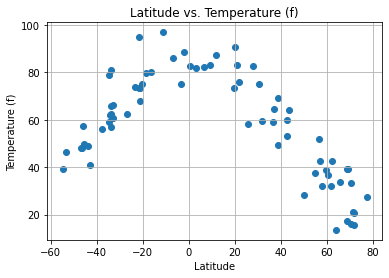

In [24]:
#Overall Latitude vs Temperature
Lattemp = data_df['Latitude']
Templat = data_df['Temperature (f)']
plt.scatter(Lattemp, Templat)
plt.xlabel('Latitude')
plt.ylabel('Temperature (f)')
plt.title('Latitude vs. Temperature (f)')
plt.grid(True)
# Save the figure.
plt.savefig('Images/Temp_vs_Lat.png')

## Latitude vs. Humidity Plot

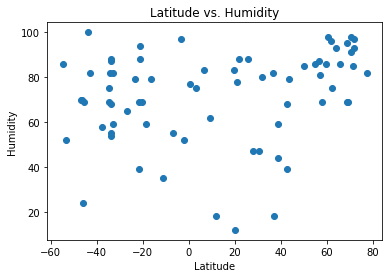

In [25]:
#Overall Latitude vs Humidity
Lathum = data_df['Latitude']
Humlat = data_df['Humidity']
plt.scatter(Lathum, Humlat)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
# Save the figure.
plt.savefig('Images/Humidity_vs_Lat.png')

## Latitude vs. Cloudiness Plot

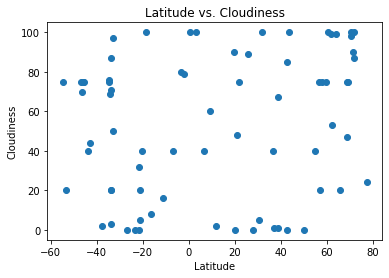

In [26]:
#Overall Latitude vs Cloudiness
Latcloud = data_df['Latitude']
Cloudlat = data_df['Cloudiness']
plt.scatter(Latcloud, Cloudlat)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
# Save the figure.
plt.savefig('Images/Cloudiness_vs_Lat.png')

## Latitude vs. Wind Speed Plot

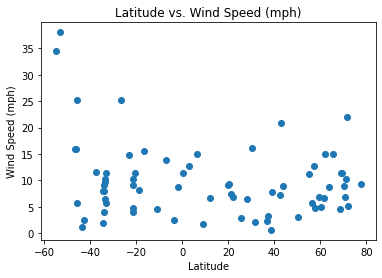

In [27]:
#Overall Latitude vs Wind Speed
Latwind = data_df['Latitude']
Windlat = data_df['Wind Speed (mph)']
plt.scatter(Latwind, Windlat)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed (mph)')
# Save the figure.
plt.savefig('Images/Windspeed_vs_Lat.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0, 0.5, 'Temperature (f)')

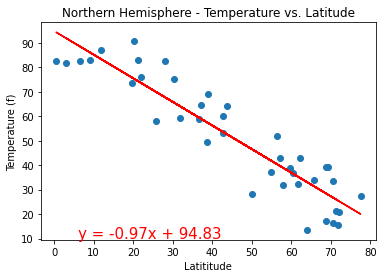

In [40]:
#Set Stuff
xvalues = Northern_df.iloc[:,2]
yvalues = Northern_df.iloc[:,3]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " +str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq, (6,10), fontsize=15, color='red')
plt.title('Northern Hemisphere - Temperature vs. Latitude')
plt.xlabel('Latititude')
plt.ylabel('Temperature (f)')
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
# Save the figure.
plt.savefig('Images/North_Temp_vs_Lat.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0, 0.5, 'Temperature (f)')

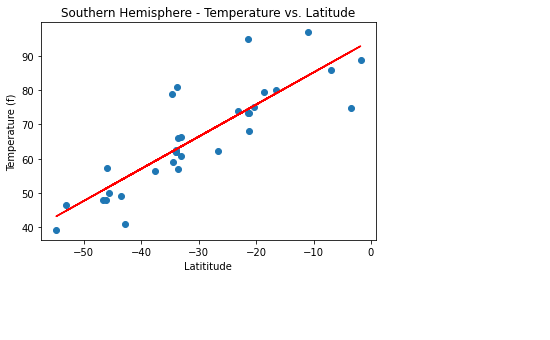

In [41]:
#Set Stuff
xvalues = Southern_df.iloc[:,2]
yvalues = Southern_df.iloc[:,3]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " +str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq, (6,10), fontsize=15, color='red')
plt.title('Southern Hemisphere - Temperature vs. Latitude')
plt.xlabel('Latititude')
plt.ylabel('Temperature (f)')
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
# Save the figure.
plt.savefig('Images/South_Temp_vs_Lat.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Temperature (f)')

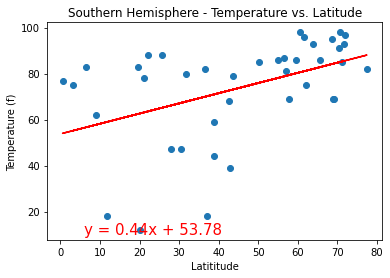

In [42]:
#Set Stuff
xvalues = Northern_df.iloc[:,2]
yvalues = Northern_df.iloc[:,4]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " +str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq, (6,10), fontsize=15, color='red')
plt.title('Northern Hemisphere - Humidity vs. Latitude')
plt.xlabel('Latititude')
plt.ylabel('Humidity')
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
# Save the figure.
plt.savefig('Images/North_Humidity_vs_Lat.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Temperature (f)')

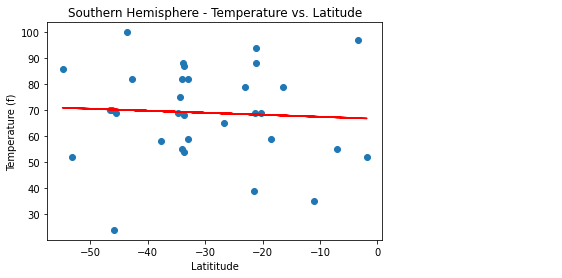

In [43]:
#Set Stuff
xvalues = Southern_df.iloc[:,2]
yvalues = Southern_df.iloc[:,4]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " +str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq, (6,10), fontsize=15, color='red')
plt.title('Southern Hemisphere - Humidity vs. Latitude')
plt.xlabel('Latititude')
plt.ylabel('Humidity')
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
# Save the figure.
plt.savefig('Images/South_Humidity_vs_Lat.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Cloudiness')

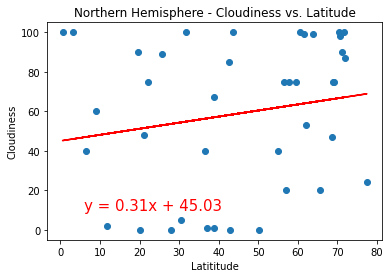

In [44]:
#Set Stuff
xvalues = Northern_df.iloc[:,2]
yvalues = Northern_df.iloc[:,5]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " +str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq, (6,10), fontsize=15, color='red')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude')
plt.xlabel('Latititude')
plt.ylabel('Cloudiness')
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
# Save the figure.
plt.savefig('Images/North_Cloud_vs_Lat.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Cloudiness')

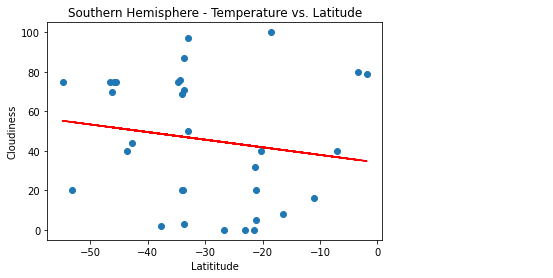

In [45]:
#Set Stuff
xvalues = Southern_df.iloc[:,2]
yvalues = Southern_df.iloc[:,5]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " +str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq, (6,10), fontsize=15, color='red')
plt.title('Southern Hemisphere - Temperature vs. Latitude')
plt.xlabel('Latititude')
plt.ylabel('Cloudiness')
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
# Save the figure.
plt.savefig('Images/South_Cloud_vs_Lat.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0, 0.5, 'Wind Speed (mph)')

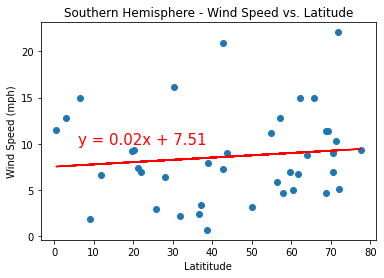

In [46]:
#Set Stuff
xvalues = Northern_df.iloc[:,2]
yvalues = Northern_df.iloc[:,6]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " +str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq, (6,10), fontsize=15, color='red')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude')
plt.xlabel('Latititude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
# Save the figure.
plt.savefig('Images/North_Wind_vs_Lat.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0, 0.5, 'Temperature (f)')

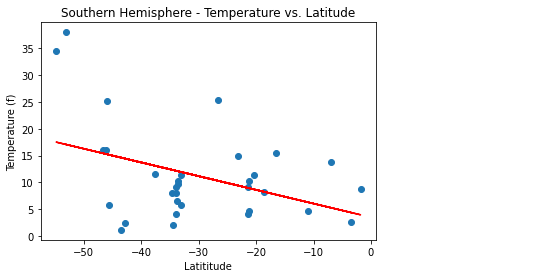

In [47]:
#Set Stuff
xvalues = Southern_df.iloc[:,2]
yvalues = Southern_df.iloc[:,6]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " +str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq, (6,10), fontsize=15, color='red')
plt.title('Southern Hemisphere - Temperature vs. Latitude')
plt.xlabel('Latititude')
plt.ylabel('Temperature (f)')
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
# Save the figure.
plt.savefig('Images/South_Wind_vs_Lat.png')